In [1]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt

import sys
sys.path.append("src")

from spscml.poisson import poisson_solve
from spscml.grids import Grid
from spscml.plasma import TwoSpeciesPlasma

from spscml.poisson import poisson_solve

(120,)
(121,)
phi: [0.         0.00621048 0.01242096 0.01863145 0.02484193 0.03105242
 0.03726291 0.0434734  0.04968389 0.05589439 0.06210489 0.06831539
 0.07452589 0.08073641 0.08694692 0.09315746 0.09936798 0.10557853
 0.11178908 0.11799964 0.12421021 0.13042076 0.13663134 0.14284192
 0.14905253 0.15526314 0.16147377 0.16768439 0.17389503 0.18010569
 0.18631636 0.19252704 0.19873777 0.2049485  0.21115923 0.21736997
 0.22358072 0.22979148 0.23600225 0.24221306 0.24842386 0.25774005
 0.2701617  0.28258333 0.29500496 0.3074266  0.3198483  0.33227003
 0.34469178 0.35711354 0.36953533 0.38195714 0.39437896 0.40680078
 0.41922262 0.4316445  0.4440664  0.45648837 0.46891037 0.4813324
 0.49375445 0.5061764  0.51859844 0.5310205  0.5434425  0.5558646
 0.5682866  0.5807088  0.593131   0.60555315 0.6179755  0.6303977
 0.64282006 0.6552425  0.6676649  0.68008745 0.69250995 0.7049324
 0.71735495 0.7297775  0.74220055 0.7515179  0.7577294  0.76394105
 0.77015275 0.7763644  0.7825762  0.78878796 0.

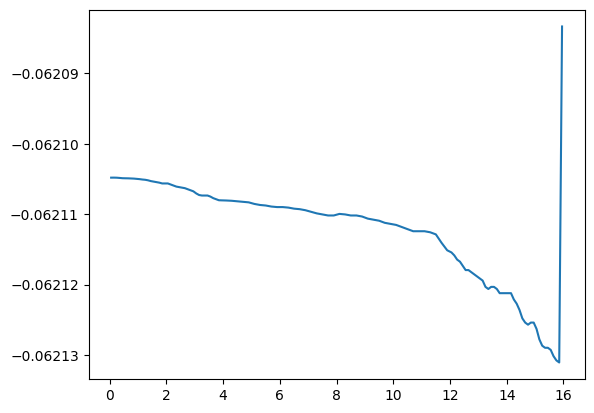

In [2]:
dxs = jnp.concatenate([
    0.1*jnp.ones(40),
    0.2*jnp.ones(40),
    0.1*jnp.ones(40),
])
face_locs = jnp.append(jnp.array([0.]), jnp.cumsum(dxs))

grid = Grid(face_locs)
rho_c = jnp.zeros(120)
plasma = TwoSpeciesPlasma(1.0, 1.0, 1.0, 1.0, 0.04, 1.0, -1.0)
Vp = 1.0
bcs = {
    'phi': {
        'left': { 'type': 'Dirichlet', 'val': 0.0 },
        'right': { 'type': 'Dirichlet', 'val': Vp },
    }
}

E = poisson_solve(grid, plasma, rho_c, bcs)

plt.plot(grid.cell_centers, E)